# S V M

# Importing Libraries

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Including the dataset

In [2]:
df=yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [3]:
# showing first 5 rows of data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Creating the usable data

In [4]:
df.reset_index(inplace=True)

In [5]:
df=df[['Date','Close']]
df1=df
df.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


# Plotting the growth trend of bitcoin prices

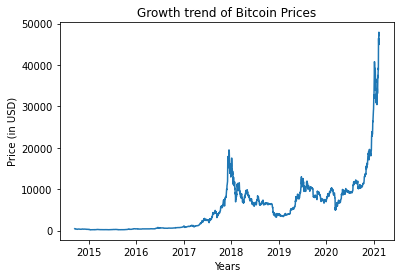

In [6]:
plt.title('Growth trend of Bitcoin Prices')
plt.xlabel('Years')
plt.ylabel('Price (in USD)')
plt.plot(df['Date'],df['Close']);

In [7]:
# Removing the 'Date' column 
df=df[['Close']]

In [8]:
df.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [9]:
# Statistical analysis
df.describe()

,Close
count,2338.000000
mean,5523.803207
std,6482.178881
min,178.102997
25%,449.468491
50%,3963.192139
75%,8678.960938
max,47909.332031


In [10]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2338 non-null   float64
dtypes: float64(1)
memory usage: 18.3 KB


In [11]:
# variable for predicting 'n' days out into the future , here n=30 days
prediction_days=30

In [12]:
# creating another column shifted 'n' units up
df['Prediction']=df[['Close']].shift(-prediction_days)

In [13]:
# showing first 5 rows of data
df.head()

,Close,Prediction
0,457.334015,383.757996
1,424.440002,391.441986
2,394.795990,389.545990
3,408.903992,382.845001
4,398.821014,386.475006


In [14]:
# showing last 7 rows of data
df.tail(7)

,Close,Prediction
2331,38903.441406,NaN
2332,46196.464844,NaN
2333,46481.105469,NaN
2334,44918.183594,NaN
2335,47909.332031,NaN
2336,47504.851562,NaN
2337,47127.289062,NaN


In [15]:
# Creating the independent dataset
X=np.array(df.drop(['Prediction'],1))

In [16]:
# Removing the last 'n' rows
X=X[:len(df)-prediction_days]
X

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [33922.9609375 ],
       [37316.359375  ],
       [39187.328125  ]])

In [17]:
# Creating the dependent dataset
Y=np.array(df['Prediction'])
Y=Y[:-prediction_days]
Y

array([  383.75799561,   391.44198608,   389.54598999, ...,
       47909.33203125, 47504.8515625 , 47127.2890625 ])

# Splitting into Training and Testing data

In [18]:
from sklearn.model_selection import train_test_split

# split the data into 80% training data, 20% testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
prediction_days_array=np.array(df.drop(['Prediction'],1))[-prediction_days:]
prediction_days_array

array([[36825.3671875 ],
       [36178.140625  ],
       [35791.27734375],
       [36630.07421875],
       [36069.8046875 ],
       [35547.75      ],
       [30825.69921875],
       [33005.76171875],
       [32067.64257812],
       [32289.37890625],
       [32366.39257812],
       [32569.84960938],
       [30432.546875  ],
       [31649.60546875],
       [34316.38671875],
       [34269.5234375 ],
       [33114.359375  ],
       [33537.17578125],
       [35510.2890625 ],
       [37472.08984375],
       [36926.06640625],
       [38144.30859375],
       [39266.01171875],
       [38903.44140625],
       [46196.46484375],
       [46481.10546875],
       [44918.18359375],
       [47909.33203125],
       [47504.8515625 ],
       [47127.2890625 ]])

# Model selection : SVM

In [20]:
from sklearn.svm import SVR

# Creating and training the support vector machine (Regression) model using radial basis function
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [21]:
# Testing the model
svr_rbf_confidence=svr_rbf.score(x_test,y_test)

# Accuracy score

In [22]:
print("Accuracy is: %.2f"%(svr_rbf_confidence*100),"%")

Accuracy is: 61.51 %


In [23]:
# Printing the predicted values of the test data
svm_prediction=svr_rbf.predict(x_test)
# print(svm_prediction)
# print()
# Printing the actual values of the test data
# print(y_test)

In [24]:
# creating data frame containing the actual test data and correspondinding predicted value
test_data_prediction={}
test_data_prediction['Actual Test data']=y_test
test_data_prediction['Prediction']=svm_prediction
testDataPrediction=pd.DataFrame(test_data_prediction)
testDataPrediction

,Actual Test data,Prediction
0,4970.788086,8442.795251
1,9743.860352,7327.172072
2,217.464005,268.929565
3,756.773987,805.744412
4,6476.290039,6210.387171
...,...,...
457,444.687012,449.945865
458,3905.227295,3891.051657
459,315.032013,370.722597
460,284.894012,263.550969


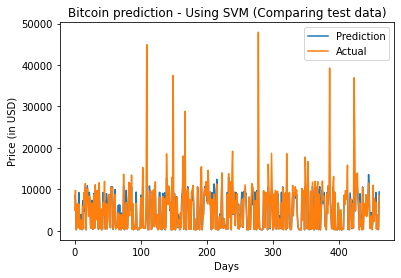

In [25]:
# Comparing the predictions of test data
plt.title('Bitcoin prediction - Using SVM (Comparing test data)')
plt.xlabel('Days')
plt.ylabel('Price (in USD)')
plt.plot(svm_prediction)

plt.plot(y_test);
plt.legend(['Prediction','Actual']);

In [26]:
# Printing the model predictions for next 30 days
svm_prediction=svr_rbf.predict(prediction_days_array)
print("Predicted Price of last 30 days: ",svm_prediction)
print()
print("Actual values of last 30 days: ",np.array(df['Close'][-prediction_days:]))

Predicted Price of last 30 days:  [10664.23598096  9589.85821626  9574.5197701  10269.08778928
  9577.86427182  9574.49668391  9574.49664496 10181.11557567
 10545.64577458 10431.69417117 10316.73061958 10353.04085733
  9574.51024864  9676.61886541  9574.49660039  9574.49660058
  9905.94116445  9577.83404469  9574.496632   10374.60938437
 10694.22538009 10213.19569851 10514.77536302 10071.35733083
  9574.49660033  9574.49660033  9574.49660033  9574.49660033
  9574.49660033  9574.49660033]

Actual values of last 30 days:  [36825.3671875  36178.140625   35791.27734375 36630.07421875
 36069.8046875  35547.75       30825.69921875 33005.76171875
 32067.64257812 32289.37890625 32366.39257812 32569.84960938
 30432.546875   31649.60546875 34316.38671875 34269.5234375
 33114.359375   33537.17578125 35510.2890625  37472.08984375
 36926.06640625 38144.30859375 39266.01171875 38903.44140625
 46196.46484375 46481.10546875 44918.18359375 47909.33203125
 47504.8515625  47127.2890625 ]


In [27]:
# Creating dictionary with keys: 'Actual' and 'Predicted' values for the next 30 days
data={}
data['Date']=list(df1['Date'][-prediction_days:])
data['Actual']=list(df['Close'][-prediction_days:])
data['Prediction']=list(svm_prediction)


In [28]:
# Creating DataFrame for 'Actual' and 'Predicted' values for the next 30 days
result_df_30days=pd.DataFrame(data)
result_df_30days

,Date,Actual,Prediction
0,2021-01-15,36825.367188,10664.235981
1,2021-01-16,36178.140625,9589.858216
2,2021-01-17,35791.277344,9574.519770
3,2021-01-18,36630.074219,10269.087789
4,2021-01-19,36069.804688,9577.864272
5,2021-01-20,35547.750000,9574.496684
6,2021-01-21,30825.699219,9574.496645
7,2021-01-22,33005.761719,10181.115576
8,2021-01-23,32067.642578,10545.645775
9,2021-01-24,32289.378906,10431.694171


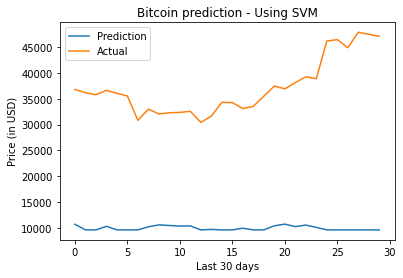

In [29]:
# Comparison plot for comparing 'Actual' and 'Predicted' values
plt.title('Bitcoin prediction - Using SVM')
plt.xlabel('Last 30 days')
plt.ylabel('Price (in USD)')
plt.plot(result_df_30days['Prediction'])

plt.plot(result_df_30days['Actual']);
plt.legend(['Prediction','Actual']);